# Bank Customer Churn

 In this notebook we are predicting based on the available features if a customer will leave or not the bank. We are using the dataset Banking Customer Churn Prediction from Kaggle.
 The dataset can be seen here: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset/data


### Business Problem
Our objective is to predict customer churn and reduce losses and retain customers
### Questions:
* What factors influence customer churn?
* How can the bank act to prevent churn once identified ?
* What are the most common characteristics of churned customers ?

### Features:

* RowNumber: The sequential number assigned to each row in the dataset.

* CustomerId: A unique identifier for each customer.

* Surname: The surname of the customer.

* CreditScore: The credit score of the customer.

* Geography: The geographical location of the customer (e.g., country or region).

* Gender: The gender of the customer.

* Age: The age of the customer.

* Tenure: The number of years the customer has been with the bank.

* Balance: The account balance of the customer.

* NumOfProducts: The number of bank products the customer has.

* HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).

* IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).

* EstimatedSalary: The estimated salary of the customer.

* Exited: Indicates whether the customer has exited the bank (binary: yes/no).

Features like NumOfProducts, HasCrCard, CreditScore may influence customer charn more than other features.
Surname, RowNumber and CustomerId will not influence the model because they are not relevant to churn.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Import the dataset
df = pd.read_csv("Churn_Modelling.csv")


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you`re working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat diffrent types ?
3. What is missing from the data and how you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features to get more out of your data ?

In [2]:
# Let's see the shape
df.shape

(10000, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We have 14 columns, mostly numerical but some are of type object

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Let's see the first 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Let's find out how many of each class there are
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

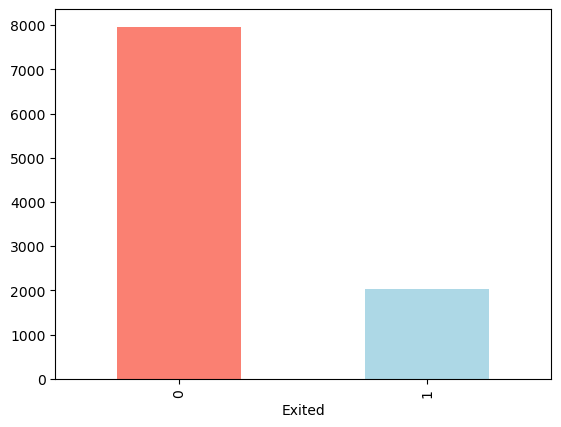

In [7]:
df['Exited'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [8]:
# Let's check missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Relantionships between features and Target

In [9]:
df.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [10]:
pd.crosstab(df.Exited, df.HasCrCard)

HasCrCard,0,1
Exited,,
0,2332,5631
1,613,1424


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

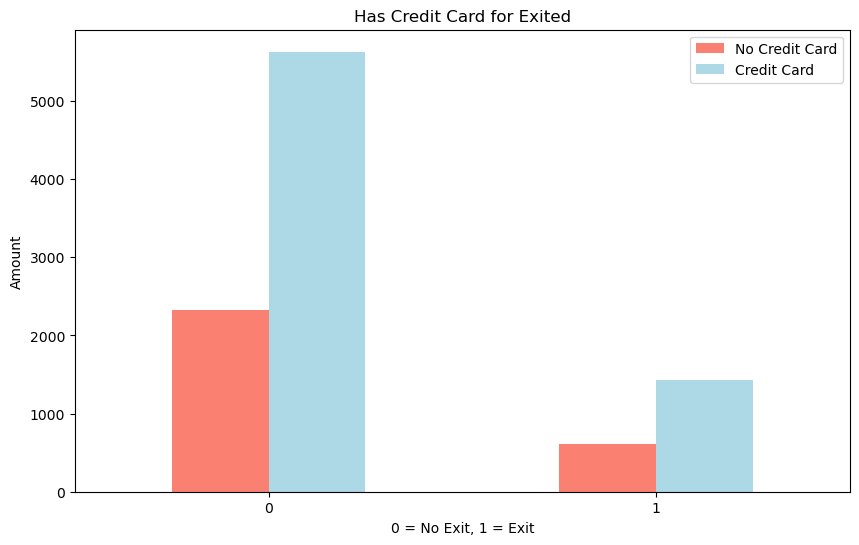

In [11]:
pd.crosstab(df.Exited, df.HasCrCard).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue']);

plt.title('Has Credit Card for Exited')
plt.xlabel("0 = No Exit, 1 = Exit")
plt.ylabel("Amount")
plt.legend(["No Credit Card", "Credit Card"])
plt.xticks(rotation=0)

In [12]:
df.NumOfProducts.value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [13]:
pd.crosstab(df.NumOfProducts, df.Exited)

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

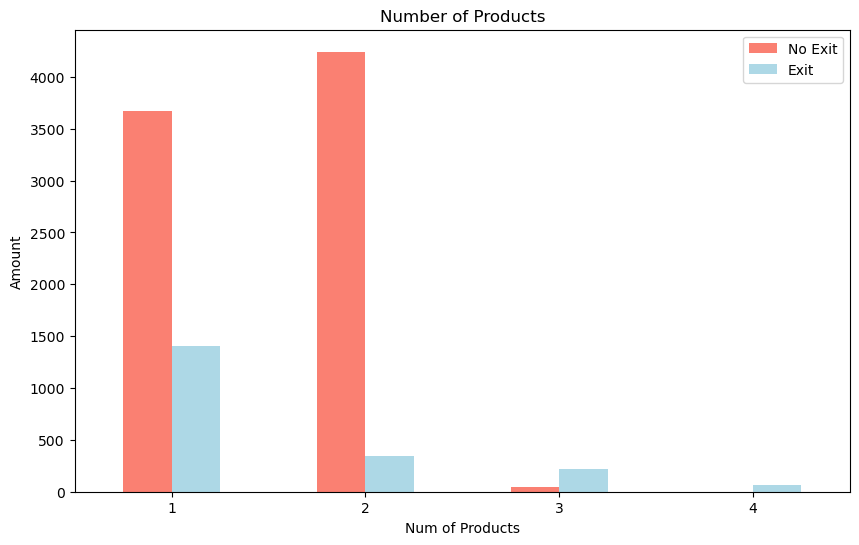

In [14]:
pd.crosstab(df.NumOfProducts, df.Exited).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue']);

plt.title('Number of Products')
plt.xlabel("Num of Products")
plt.ylabel("Amount")
plt.legend(["No Exit", "Exit"])
plt.xticks(rotation=0)

In [15]:
pd.crosstab(df.IsActiveMember, df.Exited)

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

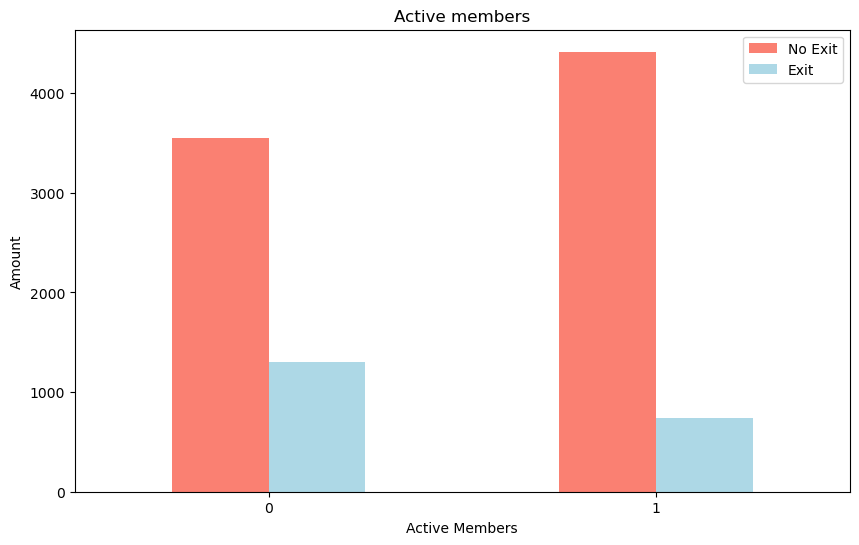

In [16]:
pd.crosstab(df.IsActiveMember, df.Exited).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue']);

plt.title('Active members')
plt.xlabel("Active Members")
plt.ylabel("Amount")
plt.legend(["No Exit", "Exit"])
plt.xticks(rotation=0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [19]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [20]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
#Le'ts make a copy of the dataframe
df_copy = df.copy()

In [22]:
df_copy

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
# We don't need RowNumber, CustomerId and Surname for our model so I am going to drop them
df_copy = df_copy.drop('RowNumber', axis=1)
df_copy = df_copy.drop('CustomerId', axis=1)
df_copy = df_copy.drop('Surname', axis=1)
df_copy

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
df_copy = pd.concat([df_copy.drop('Geography', axis=1),pd.get_dummies(df_copy.Geography,dtype='int64').add_prefix('Geography_')], axis=1)
df_copy = pd.concat([df_copy.drop('Gender', axis=1),pd.get_dummies(df_copy.Gender,dtype='int64').add_prefix('Gender_')], axis=1)

In [25]:
df_copy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [26]:
df_copy.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


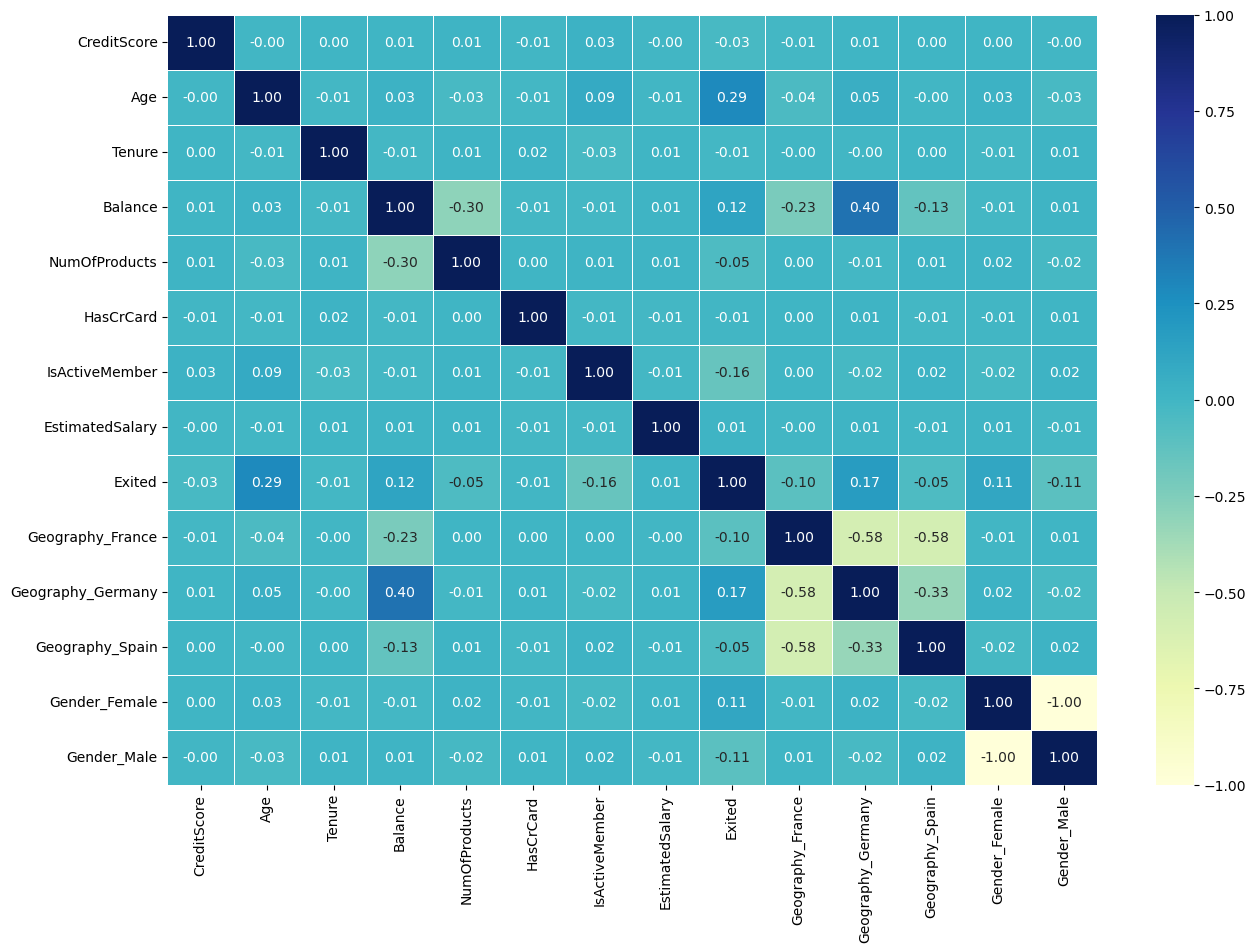

In [27]:
#Let's make the correlation matrix more visual
corr_matrix = df_copy.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

### Modeling

In [29]:
# Let's split the X and y
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [41]:
y.shape

(10000,)

In [31]:
# Import train_test split from sklearn
from sklearn.model_selection import train_test_split

In [42]:
# Split them into train, val and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, RocCurveDisplay,confusion_matrix

In [44]:
y_train.shape

(8000,)

In [47]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
}

# Create a function to fit and score score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-learn machine learning models
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [48]:
model_scores = fit_and_score(models=models, x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\DETCDR4\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DETCDR4\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:53:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Logistic Regression': 0.8,
 'Random Forest Classifier': 0.8645,
 'XGBoost': 0.8625}

<Axes: >

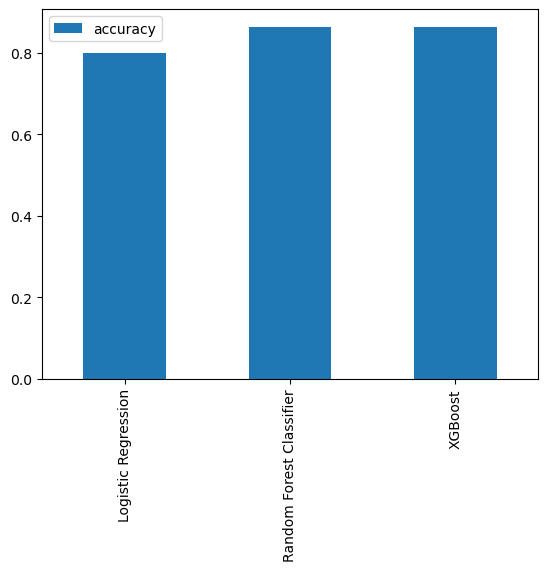

In [49]:
# Compare the models
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

Now we've got a baseline... and we know a model's first predictions aren't always what we shuld based our next stepss off. 
What should we do?
Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precission
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve

## Hyperparameter tuning with RandomizedSearchCV


In [58]:
# Tune RandomForestClassifier
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid, n_iter=5, cv=5) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=150)


In [59]:
# Tune XGBoost
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}
rs_xgb =RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=params,n_iter=5,n_jobs=-1,cv=5)
rs_xgb.fit(X_train, y_train)
rs_xgb.best_params_

{'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [62]:
print(f"Random forest:  {random_search.score(X_test,y_test)}")
rs_xgb.score(X_test,y_test)

Random forest:  0.841


0.8675

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [63]:
y_preds = rs_xgb.predict(X_test)

In [64]:
y_preds

array([0, 0, 0, ..., 1, 0, 0])

In [65]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

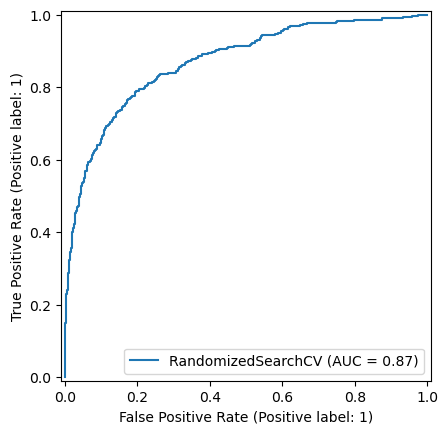

In [68]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(rs_xgb,X_test,y_test);

In [71]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1554   53]
 [ 212  181]]


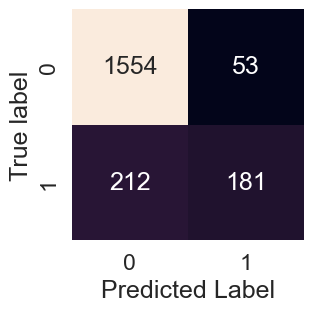

In [75]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds), annot = True, cbar=False, fmt='d')
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")
plot_conf_mat(y_test,y_preds)

### Now we've got a ROC Curve, an AUC metric and a confusion matrix, let's get a classification report as well as a cross-validated precision, recall and f1 score

In [76]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



### Calculate evaluation metrics using cross-validation

In [78]:
rs_xgb.best_params_

{'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [79]:
clf = xgb.XGBClassifier(min_child_weight = 7, max_depth=10, learning_rate = 0.05, gamma=0.4, colsample_bytree=0.5)

In [80]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.8665, 0.87  , 0.8575, 0.8705, 0.8535])

In [81]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8636000000000001

In [82]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

0.7858505436820398

In [83]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.45458279134749724

In [84]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.5753410009081763

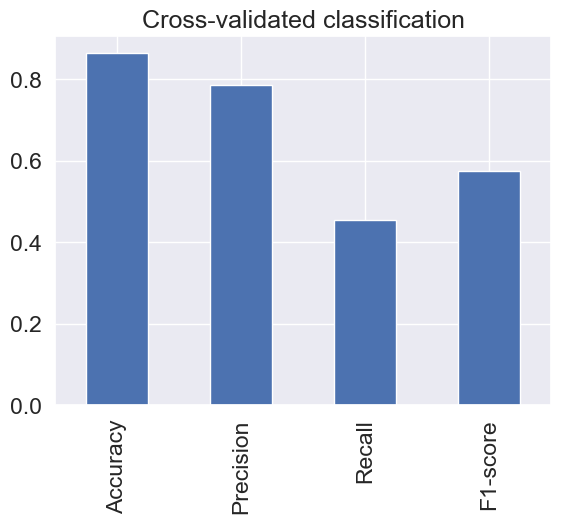

In [85]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1-score": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification', legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomus of the model and how did they contribute?"

Finding feature importance is different for each learning model. One way to find feature importance is to search for "(Model Name) feature importance".

Let's find the feature importance for our XGBoost model..

In [86]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
clf.feature_importances_

array([0.01651733, 0.08794238, 0.01569616, 0.03172533, 0.4832386 ,
       0.01404349, 0.14930391, 0.01732903, 0.02231843, 0.0958217 ,
       0.02473037, 0.02390503, 0.01742828], dtype=float32)

In [95]:
feature_dict = dict(zip(df_copy.columns, list(clf.feature_importances_)))
feature_dict

{'CreditScore': 0.016517326,
 'Age': 0.08794238,
 'Tenure': 0.01569616,
 'Balance': 0.031725332,
 'NumOfProducts': 0.4832386,
 'HasCrCard': 0.01404349,
 'IsActiveMember': 0.14930391,
 'EstimatedSalary': 0.017329033,
 'Exited': 0.02231843,
 'Geography_France': 0.0958217,
 'Geography_Germany': 0.024730368,
 'Geography_Spain': 0.02390503,
 'Gender_Female': 0.017428275}

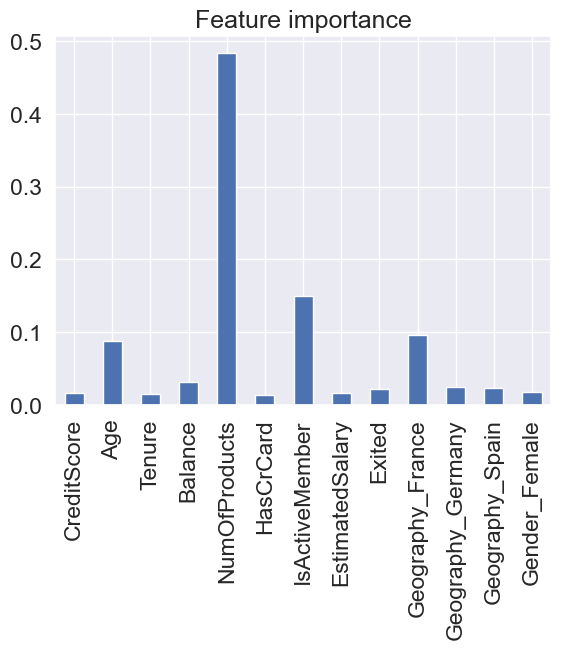

In [97]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature importance', legend=False);